In [3]:
%gui wx
import sys
import os


notebook_dir = os.path.abspath("")
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
sys.path.append(parent_dir)
sys.path.append('.')
from utils import loadFSL, FSLeyesServer, mkdir_no_exist, interactive_MCQ





import lmod
await lmod.purge(force=True)
await lmod.load('fsl/6.0.7.4')
await lmod.load('freesurfer/7.4.1')
await lmod.list()


loadFSL()


import fsl.wrappers
from fsl.wrappers import fslmaths

import mne_nirs
import nilearn
from nilearn.datasets import fetch_development_fmri

import mne
import mne_nirs
import dipy
from dipy.data import fetch_bundles_2_subjects, read_bundles_2_subjects
import xml.etree.ElementTree as ET
import os.path as op
import nibabel as nib
import glob

import ants

import openneuro
from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report


import requests
import urllib.request
from tqdm import tqdm


from fsl.wrappers import fast, bet
from fsl.wrappers.misc import fslroi
from fsl.wrappers import flirt
from fsl.wrappers import mcflirt



import glob
import pandas as pd
import numpy as np
import json
import subprocess
import matplotlib.pyplot as plt


Gtk-Message: 12:09:44.528: Failed to load module "canberra-gtk-module"


In [3]:
def get_json_from_file(fname):
    f = open(fname)
    data = json.load(f)
    f.close()
    return data

In [4]:
bids_root='data_mp1'
dataset_id = 'ds000171'
subject = '01'

deriv_root = op.join(bids_root, 'derivatives')
preproc_root = op.join(bids_root, 'derivatives','preprocessed_data')

In [5]:
subprocess.run(["openneuro-py", "download", "--dataset", dataset_id, "--target-dir", bids_root, "--include", 'sub-control{}'.format(subject)], check=True)


👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds000171 …


╭───────────────────── Traceback (most recent call last) ──────────────────────╮
│ /opt/conda/lib/python3.11/site-packages/openneuro/_cli.py:64 in download_cli │
│                                                                              │
│    61 │   ] = 5,                                                             │
│    62 ) -> None:                                                             │
│    63 │   """Download datasets from OpenNeuro."""                            │
│ ❱  64 │   download(                                                          │
│    65 │   │   dataset=dataset,                                               │
│    66 │   │   tag=tag,                                                       │
│    67 │   │   target_dir=target_dir,                                         │
│                                                                              │
│ ╭────────────────── locals ──────────────────╮                               │
│ │                  dataset

CalledProcessError: Command '['openneuro-py', 'download', '--dataset', 'ds000171', '--target-dir', 'data_mp1', '--include', 'sub-control01']' returned non-zero exit status 1.

In [5]:
fsleyesDisplay = FSLeyesServer()

14:36:07: Debug: Adding duplicate image handler for 'Windows bitmap file'
14:36:07: Debug: Adding duplicate animation handler for '1' type
14:36:07: Debug: Adding duplicate animation handler for '2' type
14:36:07: Debug: Adding duplicate image handler for 'Windows bitmap file'
14:36:07: Debug: Adding duplicate animation handler for '1' type
14:36:07: Debug: Adding duplicate animation handler for '2' type

(ipykernel_launcher.py:444): Gtk-CRITICAL **: 14:36:09.129: gtk_window_resize: assertion 'height > 0' failed


In [5]:
from nilearn.image import concat_imgs

# Define the paths to your gzipped NIfTI files
file_paths = [
    'sub-control01_task-music_run-1_bold.nii.gz',
    'sub-control01_task-music_run-2_bold.nii.gz',
    'sub-control01_task-music_run-3_bold.nii.gz'

]

def standardize(img):
    data = img.get_fdata()
    mean = np.mean(data)
    std = np.std(data)
    standardized_data = (data - mean) / std
    return nib.Nifti1Image(standardized_data, img.affine)

# Initialize a list to hold standardized data
standardized_data_list = []

# Process each file
for file_path in file_paths:
    img = nib.load(os.path.join(bids_root, 'sub-control01', 'func', file_path))
    
    standardized_data = standardize(img)
    standardized_data_list.append(standardized_data)


concatenated_img = concat_imgs(standardized_data_list)


# Save the concatenated image as a gzipped NIfTI file
nib.save(concatenated_img, os.path.join(bids_root, 'sub-control01', 'func', 'sub-control01_task-music_concatenated_bold.nii.gz'))

In [17]:
#mkdir_no_exist(bids_root)
mkdir_no_exist(deriv_root)
mkdir_no_exist(preproc_root)
mkdir_no_exist(os.path.join(preproc_root, 'sub-control01'))
mkdir_no_exist(os.path.join(preproc_root, 'sub-control01', 'func'))

path_original_data = os.path.join(bids_root, 'sub-control01', 'func', 'sub-control01_task-music_concatenated_bold')
path_moco_data = os.path.join(preproc_root, 'sub-control01', 'func', 'sub-control01_task-music_concatenated_bold_moco')
mcflirt(infile=path_original_data,o=path_moco_data, plots=True, report=True, dof=6, mats=True)

Processed data will be saved as data_mp1/derivatives/preprocessed_data/sub-control01/func/sub-control01_task-music_concatenated_bold_moco

McFLIRT v 2.0 - FMRI motion correction

Reading time series... 
first iteration - 8mm scaling, set tolerance
Rescaling reference volume [157] to 8 mm pixels
Registering volumes ... [158][159][160][161][162][163][164][165][166][167][168][169][170][171][172][173][174][175][176][177][178][179][180][181][182][183][184][185][186][187][188][189][190][191][192][193][194][195][196][197][198][199][200][201][202][203][204][205][206][207][208][209][210][211][212][213][214][215][216][217][218][219][220][221][222][223][224][225][226][227][228][229][230][231][232][233][234][235][236][237][238][239][240][241][242][243][244][245][246][247][248][249][250][251][252][253][254][255][256][257][258][259][260][261][262][263][264][265][266][267][268][269][270][271][272][273][274][275][276][277][278][279][280][281][282][283][284][285][286][287][288][289][290][291][292][293]

refnum = 157
Original_refvol = -1


Registering volumes ... [158][159][160][161][162][163][164][165][166][167][168][169][170][171][172][173][174][175][176][177][178][179][180][181][182][183][184][185][186][187][188][189][190][191][192][193][194][195][196][197][198][199][200][201][202][203][204][205][206][207][208][209][210][211][212][213][214][215][216][217][218][219][220][221][222][223][224][225][226][227][228][229][230][231][232][233][234][235][236][237][238][239][240][241][242][243][244][245][246][247][248][249][250][251][252][253][254][255][256][257][258][259][260][261][262][263][264][265][266][267][268][269][270][271][272][273][274][275][276][277][278][279][280][281][282][283][284][285][286][287][288][289][290][291][292][293][294][295][296][297][298][299][300][301][302][303][304][305][306][307][308][309][310][311][312][313][314][156][155][154][153][152][151][150][149][148][147][146][145][144][143][142][141][140][139][138][137][136][135][134][133][132][131][130][129][128][127][126][125][124][123][122][121][120][119][

{}

In [11]:
fsleyesDisplay.show()
fsleyesDisplay.resetOverlays()
fsleyesDisplay.load(path_original_data)
fsleyesDisplay.load(path_moco_data)


(ipykernel_launcher.py:444): Gdk-WARNING **: 14:41:47.345: gdkdrawable-x11.c:952 drawable is not a pixmap or window


In [17]:
def load_mot_params_fsl_6_dof(path):
    return pd.read_csv(path, sep='  ', header=None, 
            engine='python', names=['Rotation x', 'Rotation y', 'Rotation z','Translation x', 'Translation y', 'Translation z'])

mot_params = load_mot_params_fsl_6_dof(op.join(preproc_root, 'sub-control01', 'func', 'sub-control01_task-music_concatenated_bold_moco.par'))
mot_params

,Rotation x,Rotation y,Rotation z,Translation x,Translation y,Translation z
0,-0.003267,0.002930,5.552720e-07,-0.059817,-0.518985,-0.470659
1,-0.003333,0.002930,-1.600820e-04,-0.066681,-0.490942,-0.467984
2,-0.003147,0.002880,-1.880300e-04,-0.053630,-0.470922,-0.446214
3,-0.003264,0.003291,-3.337180e-04,-0.067658,-0.483699,-0.463707
4,-0.002729,0.003120,-3.183150e-04,-0.073350,-0.470581,-0.494909
...,...,...,...,...,...,...
310,0.008946,-0.000008,-2.131270e-03,-0.087116,0.400872,0.237711
311,0.009100,-0.000159,-2.114960e-03,-0.084539,0.374362,0.217879
312,0.009154,-0.000425,-1.901570e-03,-0.085075,0.404540,0.224777
313,0.008975,-0.000425,-2.162820e-03,-0.103438,0.370850,0.211481


In [9]:
def compute_FD_power(mot_params):
    framewise_diff = mot_params.diff().iloc[1:]

    rot_params = framewise_diff[['Rotation x', 'Rotation y', 'Rotation z']]
    # Estimating displacement on a 50mm radius sphere
    # To know this one, we can remember the definition of the radian!
    # Indeed, let the radian be theta, the arc length be s and the radius be r.
    # Then theta = s / r
    # We want to determine here s, for a sphere of 50mm radius and knowing theta. Easy enough!
    
    # Another way to think about it is through the line integral along the circle.
    # Integrating from 0 to theta with radius 50 will give you, unsurprisingly, r0 theta.
    converted_rots = rot_params*50
    trans_params = framewise_diff[['Translation x', 'Translation y', 'Translation z']]
    fd = converted_rots.abs().sum(axis=1) + trans_params.abs().sum(axis=1)
    return fd

fd = compute_FD_power(mot_params).to_numpy()

In [13]:
threshold = np.quantile(fd,0.75) + 1.5*(np.quantile(fd,0.75) - np.quantile(fd,0.25))
#%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(range(1, fd.size+1)), fd)
plt.xlabel('Volume')
plt.ylabel('FD displacement (mm)')
plt.hlines(threshold, 0, 370,colors='black', linestyles='dashed', label='FD threshold')
plt.legend()
plt.show()

NameError: name 'fd' is not defined

In [56]:
output_path = op.join(preproc_root, 'sub-control01', 'func', 'sub-control01_task-music_concatenated_bold_moco.nii.gz')

cmd = 'fslmaths {} -s {} {}_smoothed-6mm'.format(output_path, 10/2.3548, output_path)
subprocess.run(['fslmaths',output_path, '-s', str(10/2.3548), '{}_smoothed-6mm'.format(output_path)])

CompletedProcess(args=['fslmaths', 'data_mp1/derivatives/preprocessed_data/sub-control01/func/sub-control01_task-music_concatenated_bold_moco.nii.gz', '-s', '4.246645150331238', 'data_mp1/derivatives/preprocessed_data/sub-control01/func/sub-control01_task-music_concatenated_bold_moco.nii.gz_smoothed-6mm'], returncode=0)

In [20]:

fsleyesDisplay.resetOverlays()
fsleyesDisplay.load(output_path + '_smoothed-6mm')

NameError: name 'fsleyesDisplay' is not defined

In [5]:

func_path = op.join(bids_root, 'sub-control01', 'func')



evt1=pd.read_csv(op.join(func_path, 'sub-control01_task-music_run-1_events.tsv'), sep='\t')
evt2=pd.read_csv(op.join(func_path, 'sub-control01_task-music_run-2_events.tsv'), sep='\t')
evt3=pd.read_csv(op.join(func_path, 'sub-control01_task-music_run-3_events.tsv'), sep='\t')


evt_concat=pd.concat([evt1,evt2,evt3], ignore_index=True)
evt_concat

,onset,duration,trial_type
0,0.0,33.0,tones
1,33.0,3.0,response
2,36.0,31.5,negative_music
3,67.5,3.0,response
4,70.5,31.5,tones
5,102.0,3.0,response
6,105.0,31.5,positive_music
7,136.5,3.0,response
8,139.5,31.5,tones
9,171.0,3.0,response


In [6]:
evt_concat["onset"] = evt_concat["duration"].cumsum()
evt_concat

,onset,duration,trial_type
0,33.0,33.0,tones
1,36.0,3.0,response
2,67.5,31.5,negative_music
3,70.5,3.0,response
4,102.0,31.5,tones
5,105.0,3.0,response
6,136.5,31.5,positive_music
7,139.5,3.0,response
8,171.0,31.5,tones
9,174.0,3.0,response


In [6]:
import numpy as np

# Set parameters
TR = 3  # Repetition time (in seconds)
total_time = 936  # Total time of the scan in seconds
time_points = np.arange(0, total_time, TR)


In [7]:
from nilearn.glm.first_level import make_first_level_design_matrix

# Generate design matrix using Nilearn's HRF
design_matrix = make_first_level_design_matrix(
    frame_times=time_points,
    events=evt_concat,
    hrf_model='spm',
    drift_model='polynomial'
)

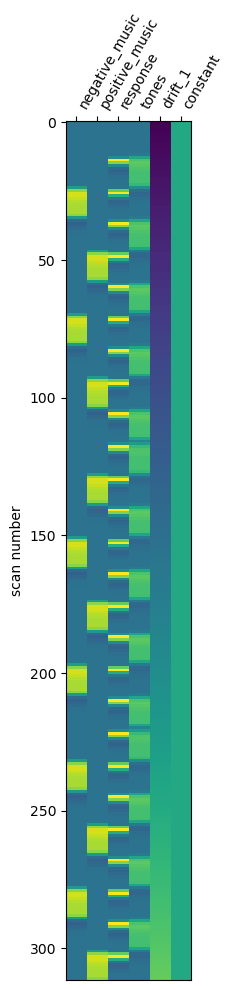

In [8]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)
plt.show()

In [57]:
fmri_img = op.join(preproc_root, 'sub-control01', 'func', 'sub-control01_task-music_concatenated_bold_moco.nii.gz_smoothed-6mm.nii.gz')

In [27]:
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel

# Specify what sort of GLM we want (nature of the noise, repetition time of the data and other parameters)
fmri_glm = FirstLevelModel(t_r=3,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None,
                           high_pass=.01)

# Fit the model to our design and data
fmri_glm = fmri_glm.fit(fmri_img, evt_concat)

In [29]:
# Create the dictionary of the conditions

conditions = {
    'active_neg': np.array([1, 0, 0,0,0]), # Specify the np array, e.g. np.array([2, -1, 0]) to extract active
    'active_pos':np.array([0, 1,0,0,0]),
    'response':np.array([0,0,1,0,0]),
    'rest':np.array([0,0,0,1,0])# Specify the np array, e.g. np.array([2, -1, 0]) to extract rest
}

active_minus_rest = conditions['active_pos'] - conditions['active_neg']

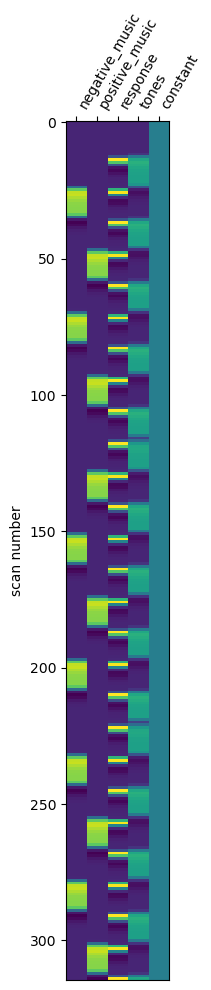

In [30]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(fmri_glm.design_matrices_[0])
plt.show()

In [31]:
import nibabel as nib
z_map = fmri_glm.compute_contrast(active_minus_rest,
                                  output_type='z_score')

nib.save(z_map, 'z_map_uncorrected.nii.gz')

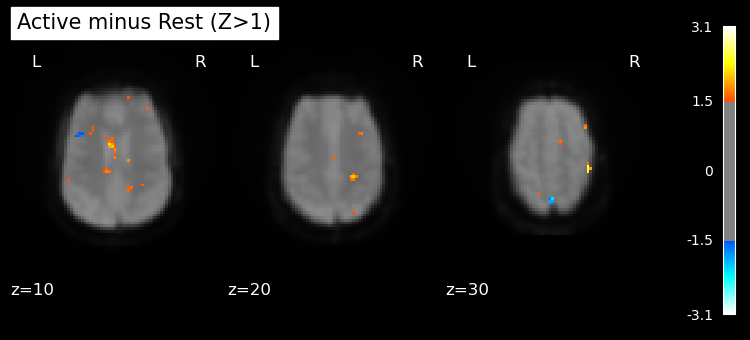

In [33]:
from nilearn.plotting import plot_stat_map
from nilearn.image import mean_img
mean_img_ = mean_img(fmri_img),
plot_stat_map(z_map, bg_img=mean_img_[0], threshold=1.5,
              display_mode='z', cut_coords=[10,20,30], black_bg=True,
              title='Active minus Rest (Z>1)')
plt.show()

In [19]:
np.where(fd>threshold)


NameError: name 'fd' is not defined

In [32]:
reg = np.zeros((936))
reg[::np.where(fd>threshold)] = 1

design_mat_regged = fmri_glm.design_matrices_[0].copy()
design_mat_regged['motion outlier'] = reg

plot_design_matrix(design_mat_regged)
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [58]:
from scipy.stats import zscore
from sklearn.decomposition import FastICA, PCA

img = nib.load(fmri_img)
img_data = img.get_fdata()

affine = nib.load(fmri_img).affine
x,y,z,t = img_data.shape

N_vol=315
N_subj=1 ## NOTE: You can increase or decrease the number of subjects
N_tot=N_vol*N_subj

#* Initialize X
X = np.zeros((N_tot,x*y*z)) # total_timepoints(15subj*200timepoints) x voxel_num
i = 0
n_nii  = 0
nb_subj_counted=0
for root, dirs, files in sorted(os.walk(op.join(preproc_root, 'sub-control01', 'func'))):
    if len(files)!= 0:
        nb_subj_counted=nb_subj_counted+1
        if nb_subj_counted > N_subj:
            break
        print(f"Loading subject {nb_subj_counted}")
    for j in range(len(files)):
        
        file = sorted(files)[j]
        if file.endswith('sub-control01_task-music_concatenated_bold_moco.nii.gz_smoothed-6mm.nii.gz'):
            print("1")
            if nb_subj_counted<N_subj+1:
                print(X.shape)
                print((nib.load(root+'/'+file).get_fdata()[:,:,:,n_nii]).flatten().shape)
                X[n_nii,:] = (nib.load(root+'/'+file).get_fdata()[:,:,:,n_nii]).flatten()
                n_nii+=1

X = zscore(X) # across subjects
X = np.nan_to_num(X,0) # nan to 0s
print("X matrix size: ", X.shape)



Loading subject 1
1
(315, 320000)
(320000,)
X matrix size:  (315, 320000)


In [78]:
#* Run FastICA on X -- check 

S_dict = {}

# assign the variable nb_components to be the list of components (try 3-5 values )

nb_components =  [9,]#10]#20, 60 ...]

## NOTE that 60 components can be computational costly

#* We will transpose the matrix X so that ICA algorithm operates on the voxels dimension.
#* In other words, the estimated sources (S) should be have dimensionality [#voxels]

for n in nb_components:
    print(f"Processing component {n}")
    # run PCA as a preprocessing step for ICA with twice the number of components
    n2=2*n
    ### YOUR CODE HERE
    pca = PCA(n_components=n2)
    H = pca.fit_transform(X.T)  # Reconstruct signals based on orthogonal components
    
    # Reminder: Fast ICA model S = X W
    print("Running FastICA with n = %d components" %n)

    ica = FastICA(n_components=n, random_state=1, max_iter=10000)
    S_ = ica.fit_transform(H)  # Get the estimated sources (S)

    print(S_.shape)
    W_ = ica.components_ # Get the estimated un-mixing matrix (W) -- will not be used further on
    S_dict[n] = S_ # store the results in a dictionary

    print("Done")

Processing component 9
Running FastICA with n = 9 components
(320000, 9)
Done


/opt/conda/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [70]:
print("The shape of the estimated Sources is: {}".format(S_.shape))

The shape of the estimated Sources is: (320000, 6)


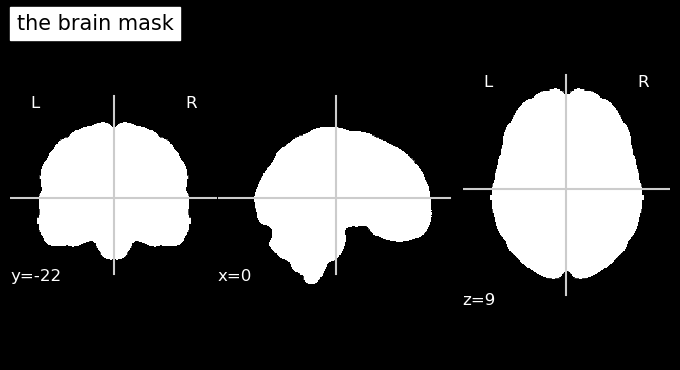

In [49]:
# J'ai remis ça ici mais on s'en fout c'est juste pour la T1w img



from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, show


#* Build brain mask to restrict analysis within the brain
icbms = datasets.fetch_icbm152_2009()
masker = NiftiMasker(mask_img=icbms.mask)
plot_stat_map(icbms.mask, black_bg=True, title='the brain mask', colorbar=False,)

In [40]:
def get_skull_stripped_anatomical(bids_root, preproc_root, subject_id, robust=False):
    """
    Perform skull-stripping on the T1w anatomical image for the specified subject.
        Parameters
    ----------
    bids_root: string
        The root of the BIDS directory
    preproc_root: string
        The root of the preprocessed data, where the result of the brain extraction will be saved.
    subject_id: string
        Subject ID, the subject on which brain extraction should be conducted.
    robust: bool
        Whether to conduct robust center estimation with BET or not. Default is False.
    """
    subject = f'sub-{subject_id}'
    anatomical_path = op.join(bids_root, subject, 'anat', f'{subject}_T1w.nii.gz')
    
    betted_brain_path = op.join(preproc_root, subject, 'anat', f'{subject}_T1w')

    mkdir_no_exist(op.join(preproc_root, subject, 'anat'))
    
    os.system(f'bet {anatomical_path} {betted_brain_path} -m {"-R" if robust else ""}')
    print("Done with BET.")

resulting_mask_path = op.join(preproc_root, 'sub-control01', 'anat', 'sub-control01_T1w_mask')

get_skull_stripped_anatomical(bids_root, preproc_root, "control01", robust=True)

Done with BET.


In [41]:
def apply_fsl_math_approach(img_path, mask_path, masked_img_path):
    """
    Parameters
    ----------
    img_path: str
        Path to the input image that needs to be masked.
    mask_path: str
        Path to the mask image.
    masked_img_path: str
        Path where the masked output image will be saved.
    """
    # Execute the fslmaths command with the -mas option
    os.system('fslmaths {} -mas {} {}'.format(img_path, mask_path, masked_img_path))
    print(f"Masked image saved at: {masked_img_path}")

# Define paths based on your dataset structure
subject_id = "control01"
anatomical_path = op.join(bids_root, f'sub-{subject_id}', 'anat', f'sub-{subject_id}_T1w.nii.gz')  # Original brain
betted_brain_path = op.join(preproc_root, f'sub-{subject_id}', 'anat', f'sub-{subject_id}_T1w.nii.gz')  # Skull-stripped brain
resulting_mask_path = op.join(preproc_root, f'sub-{subject_id}', 'anat', f'sub-{subject_id}_T1w_mask.nii.gz')  # The mask

apply_fsl_math_approach(betted_brain_path, resulting_mask_path, anatomical_path)

Masked image saved at: data_mp1/sub-control01/anat/sub-control01_T1w.nii.gz


In [45]:
T1w_img = nib.load(op.join(preproc_root, 'sub-control01','anat','sub-control01_T1w.nii.gz'))

Number of components:  10


/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


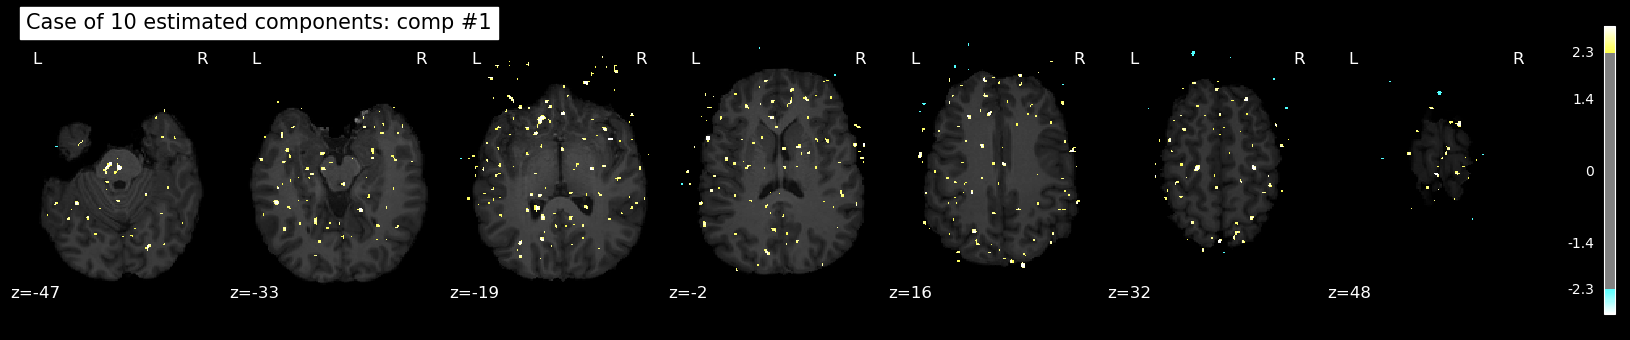

/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


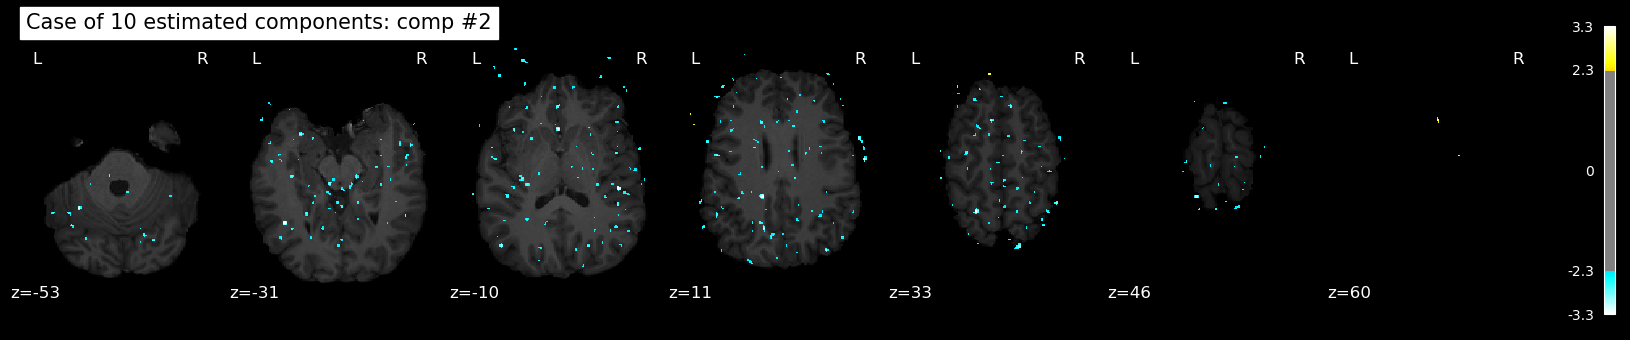

/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


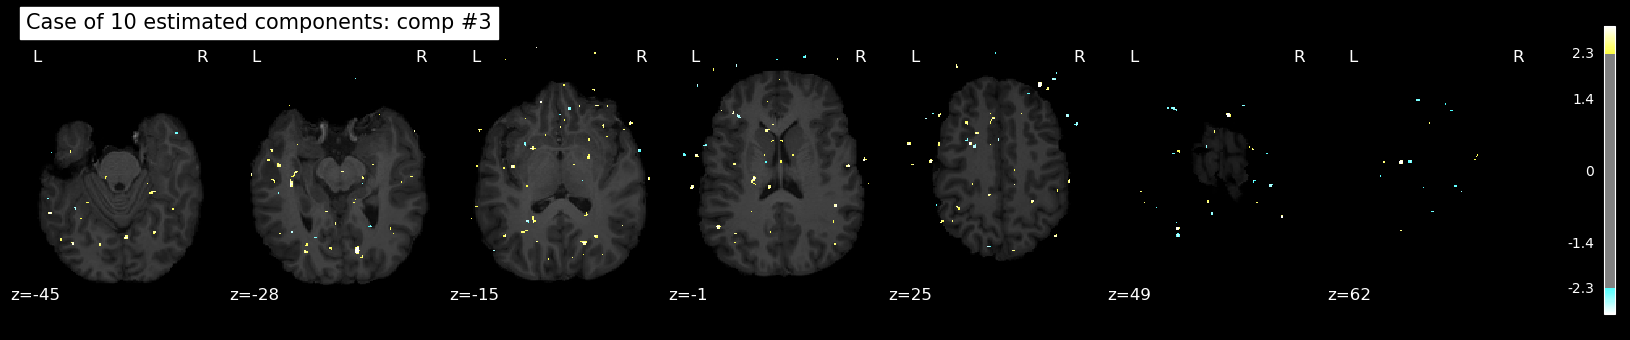

/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


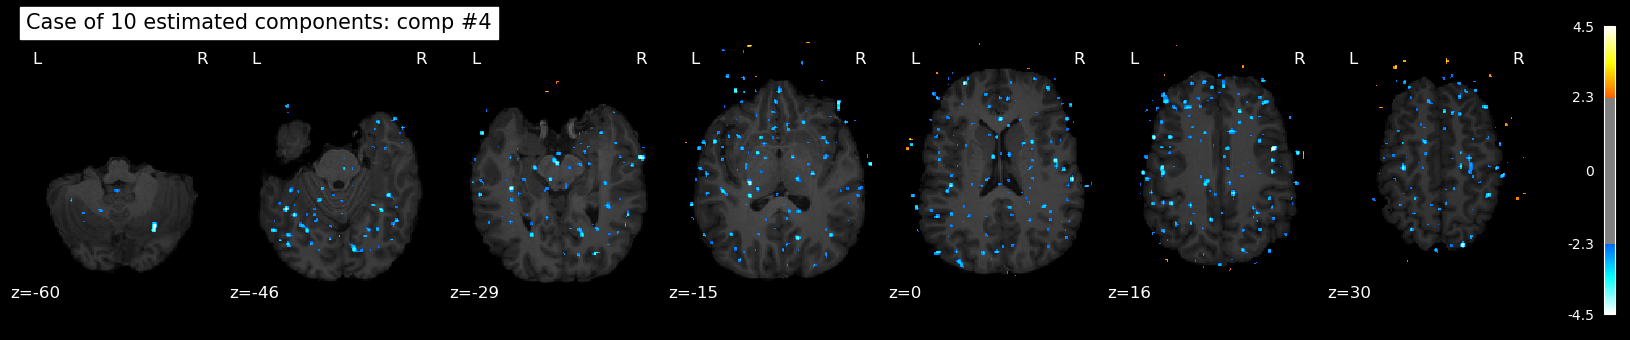

In [76]:
# Reprendre ici

or n in nb_components:
    print('Number of components: ',n)
    S_ = S_dict[n].copy()
    for idx, s in enumerate(S_.T[:min(4, S_.T.shape[0]),:]): # plot min(4, #comp_estimated) components , change 10 with 4 to plot less
        s_img = nib.Nifti1Image(np.reshape(s, (x,y,z)), affine)
        data = masker.fit_transform(s_img)
        masked_ = masker.inverse_transform(data) # mask the components
        plot_stat_map(masked_, display_mode="z", title='Case of {} estimated components: comp #{}'.format(n,idx+1),
                      colorbar=True, black_bg=True, threshold=2.3*np.std(s), bg_img=T1w_img,)
                      #output_file=save_results + "ICA_components_{}_n_{}.png".format(idx,n)) # uncomment to save plot
        plt.show()

Number of components:  3


/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


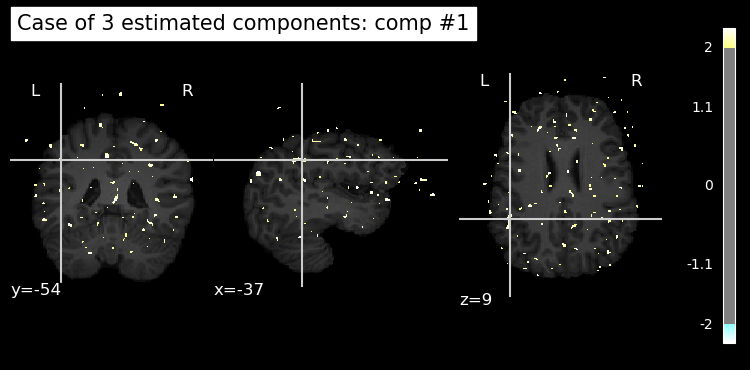

/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


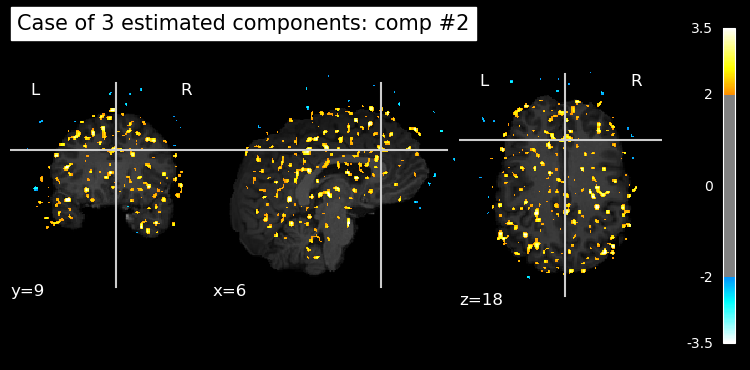

/opt/conda/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


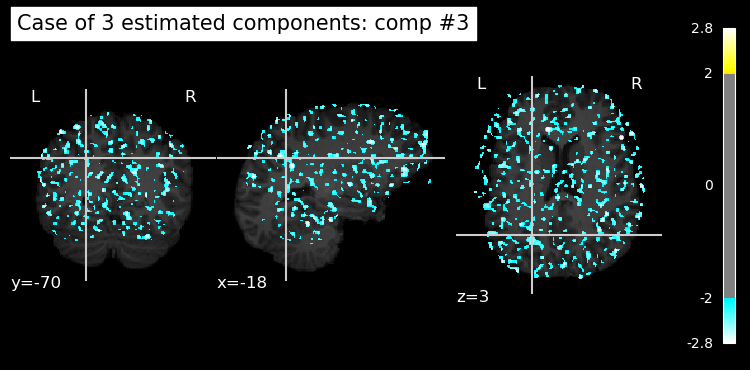

In [51]:
for n in nb_components:
    print('Number of components: ',n)
    S_ = S_dict[n].copy()
    for idx, s in enumerate(S_.T[:min(10, S_.T.shape[0]),:]): # plot min(4, #comp_estimated) components
        s_img = nib.Nifti1Image(np.reshape(s, (x,y,z)), affine)
        data = masker.fit_transform(s_img)
        masked_ = masker.inverse_transform(data) # mask the components
        plot_stat_map(masked_, display_mode="ortho", title='Case of {} estimated components: comp #{}'.format(n,idx+1),
                      colorbar=True, black_bg=True, threshold=2*np.std(s), bg_img=T1w_img,)
                      #output_file=save_results + "ICA_components_{}_n_{}.png".format(idx,n)) # uncomment to save plot
        plt.show()